### 构造非线性数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#创建 -4 到 2 的 100个数
x = np.random.uniform(-4,2,size=(100))
#设置 y = 2*x^2 + 4*x +3    
#np.random.randn(100)  加点浮动值
y = 2*x**2 + 4*x + 3 + np.random.randn(100)

X = x.reshape(-1,1)

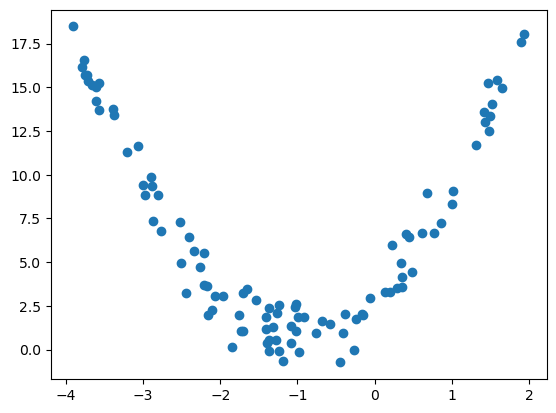

In [3]:
plt.scatter(x,y)
plt.show()

# 线性回归

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression()

In [5]:
y_predict = linear_regression.predict(X)

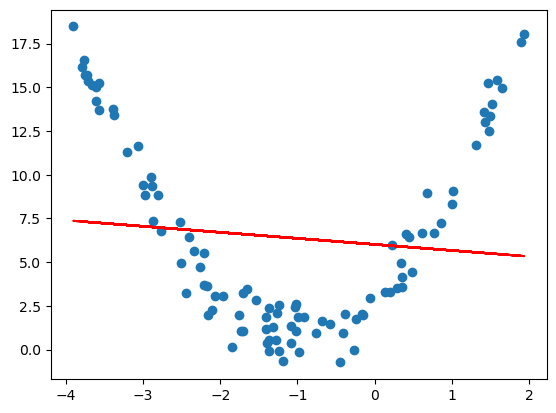

In [6]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.show()

# 多项式回归


In [7]:
X[:5]

array([[-3.37232226],
       [-3.00374661],
       [-0.38554927],
       [-1.36372141],
       [ 0.28809784]])

In [9]:
#添加新的特征值 X^2
#hstack 横向合并
X_new = np.hstack([X,X**2])

In [10]:
X_new[:5]

array([[-3.37232226, 11.37255743],
       [-3.00374661,  9.02249371],
       [-0.38554927,  0.14864824],
       [-1.36372141,  1.85973609],
       [ 0.28809784,  0.08300037]])

In [11]:
linear_regression_new = LinearRegression()
linear_regression_new.fit(X_new,y)

LinearRegression()

In [12]:
y_predict_new = linear_regression_new.predict(X_new)

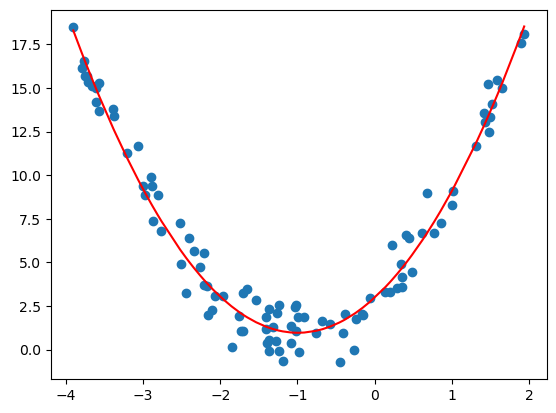

In [16]:
plt.scatter(x,y)

#x需要np.sort 进行排序  不按次序拍的话无法得到平滑的线，高点和低点会相连
plt.plot(np.sort(x),y_predict_new[np.argsort(x)],color="red")
#plt.plot(x,y_predict_new,color="red")

plt.show()

In [17]:
#函数的截距
linear_regression_new.intercept_

2.9849662667244097

In [18]:
#函数的系数
linear_regression_new.coef_

array([4.06493782, 2.04585409])

# scikit-learn中的PolynomialFeatures 为分类函数添加 新的特征值 例如x^2

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#PolynomialFeatures(degree=2) degree 为分类函数  添加 几次的幂向量
polynomial_features = PolynomialFeatures(degree=2)
#polynomial_features.fit_transform 得到添加了幂 特征值的函数
X_poly = polynomial_features.fit_transform(X)

In [21]:
#为什么所有的特征值都是1 他其实帮我们加了x0 ,而这个x0 =1
X_poly[:5]

array([[ 1.        , -3.37232226, 11.37255743],
       [ 1.        , -3.00374661,  9.02249371],
       [ 1.        , -0.38554927,  0.14864824],
       [ 1.        , -1.36372141,  1.85973609],
       [ 1.        ,  0.28809784,  0.08300037]])